# Part 1

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Section آ

In [2]:
# read video
cap = cv.VideoCapture("./MRI-Head.avi")

# calculating average
avg = None
num_frames = 0
first_flag = False
while cap.isOpened():
    ret, frame = cap.read()
    if ret != False:
        if not first_flag:
            first_frame = frame
            first_flag = True
            avg = frame.astype(np.uint16)
            num_frames += 1
        else:
            avg += frame.astype(np.uint16)
            num_frames += 1
    else:
        break
print(f"number of frames: {num_frames}")

number of frames: 20


In [3]:
avg = avg / num_frames
avg = avg.astype(np.uint8)
print(f"shape of average: {avg.shape}")

shape of average: (256, 256, 3)


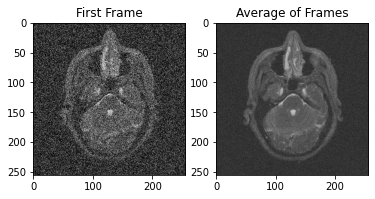

In [4]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(first_frame)
ax[0].set_title("First Frame")
ax[1].imshow(avg)
ax[1].set_title("Average of Frames")
plt.show()

## Section ب

In [5]:
# loading masks
mask1 = np.load("./mask1.npy")
mask2 = np.load("./mask2.npy")

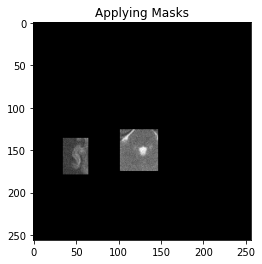

In [6]:
first = np.multiply(avg[..., 0], mask1)
second = np.multiply(avg[..., 0], mask2)
plt.imshow(first + second, cmap="gray")
plt.title("Applying Masks")
plt.show()

<div style="text-align: right">هر ماسک برای جدا سازی بخشی از تصویر است به گونه ای که داخل هر ماسک متناظر جایی از تصویر که میخواهیم درست (ترو) قرار میدهیم و برای جاهایی که نمیخواهیم غلط(فالس) قرار میدهیم که مانند گیت اند(و) منطقی عمل کند</div>

<div style="text-align: right"> logical and </div>

<div style="text-align: right">ضرب کردن در واقع در ماسک فالسهارا صفر کرده و تروها را یک میکند یعنی جاهایی که نمی خواهیم صفر(سیاه) میشود و جاهایی که میخواهیم مقدار حقیقی خود باقی میماند</div>

<div style="text-align: right">در ماسک برای یک قسمت میانی و در ماسک دو برای قسمت گوش عدد یک قرار دارد</div>

<div style="text-align: right">جمع کردن در واقع دو ماسک شده را کنار هم قرار میدهد </div>